# Introduction to Data Pre-processing
Data pre-processing is one of the important step of the Data Science pipeline. The quality of data and the useful information can be derived from it which directly affects our model to learn. It is also necessary to convert the categorical data to numerical as machine learning algorithm takes only numerical data. In this tutorial, you will learn basic data pre-processing steps.

We are going to use the titanic dataset.

## About Titanic
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

In the Hollywood blockbuster that was modelled on this tragedy, it seemed to be the case that upper-class people, women and children were more likely to survive than others. But did these properties (socio-economic status, sex and age) really influence one's survival chances?





## Loading Libraries
You can load all the libraries that you think will require or you can import as you go along.

**Alias for libraries:** numpy --> np, pandas --> pd

In [ ]:
import numpy as np        # A fundamental package for linear algebra and multidimensional arrays
import pandas as pd       # Data analysis and manipulation tool.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading Data
The data is in csv format. Let's load the csv data using pandas read_csv() function.

In [ ]:
# I have provided the path of data which I have saved in my drive as 'titanic_train_data'.
# You provide the path where you have saved the data.
titanic_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/titanic - titanic.csv")

## Data Overview and Summary
Let's look how the data look like and a concise summary of the data.

In [ ]:
# Displaying 5 random records
titanic_data.sample(5)     # You can pass the number of random records that you want to be displayed in 'sample()'

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
318,319,1,1,"Wick, Miss. Mary Natalie",female,31.0,0,2,36928,164.8667,C7,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
301,302,1,3,"McCoy, Mr. Bernard",male,NaN,2,0,367226,23.2500,NaN,Q
718,719,0,3,"McEvoy, Mr. Michael",male,NaN,0,0,36568,15.5000,NaN,Q


We can observe that there are some null values (i.e. NaN) in 'Age' and 'Cabin' attributes.

In [ ]:
# A concise summary of the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The concise summary of data tells us:
*  There are total 891 observations / records in the dataset
*  Age, Cabin and Embarked features have missing values. Cabin has a lot of missing values. Embarked has only two missing values.
*  There are some categorical variables like Embarked, Sex, which are required to be converted into numerical.

Similarly, you can observe some other information from above concise summary.



#### Exploring the attributes:
*  'Pclass' column contains a number which indicates class of the passenger's ticket:  1 for first class, 2 for second class and 3 for third class. This could function as a proxy for the socio-economic status of the passenger ('upper', 'middle', 'low').


*  The 'SibSp' column contains the number of siblings + spouses of the passenger also aboard the Titanic;

*  The 'ParCh' column indicates the number of parents + children of the passenger also aboard the Titanic.

*  The 'Ticket' column contains the ticket numbers of passengers (which are not likely to have any predictive power regarding survival);

*  'Cabin' contains the cabin number of the passenger, if he/she had a cabin, and lastly,

*  'Embarked' indicates the port of embarkation of the passenger: **C**herbourg, **Q**ueenstown or **S**outhampton. The meaning of the other columns is clear, I think.

# Data Pre - processing
Now we come to the main agenda of this tutorial i.e. data pre-processing.

### Dropping Irrelavent Features / Columns
Here the goal is to predict the survival of the passengers. We can understand form our common sense or understanding that a person cannot survive because of his / her name, ticket number or cabin. So, we can say that these are irrelavent features. Let's drop these features from the dataset as these do not contribute much for the survival of the passenger.

This is very subjective and solely depends on the nature of the dataset and underlying context. We cannot generalize this procedure to all the datasets.

**drop column Name, Ticket, Cabin**

In [ ]:
list_dropping = ['Ticket', 'Cabin']

for column in list_dropping:
    titanic_data = titanic_data.drop(column, axis=1)

titanic_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


If you notice, there are no 'Name', 'Ticket' and 'Cabin' features in the dataframe.

#Replace Missing Values


In [ ]:
print(titanic_data.isnull().values.any())

True


In [ ]:
print(titanic_data.isnull().sum().sum())

179


In [ ]:
print(titanic_data['Age'].isnull().sum())

177


In [ ]:
print(titanic_data['Embarked'].isnull().sum())

2


If you notice here we have dropped 179 rows out of 891 rows and have lost lot of data i.e. out of 891 records, 179 records are good amount of data and we have lost those data.

The more data you feed the machine learning model, the better performance it gives. So, we always try to preserve data as much as possible.

### Taking Care of Missing Data
There are some missing values in 'Age' and 'Embarked' features.


In [2]:
check = ["Age" , "Embarked"]

for i in check:
  missing = titanic_data[i].isnull().sum()


NameError: ignored

In [ ]:
# We can check if there still exist any missing value using the info() method
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


All the features have 891 non - null values. Now we don't have nay missing values.

In [ ]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,44.5,0,0,8.4583,Q
6,7,0,1,male,54.0,0,0,51.8625,S
7,8,0,3,male,2.0,3,1,21.0750,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C


#Explore Data with Scatter plot  between Fare and Pclass attributes

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

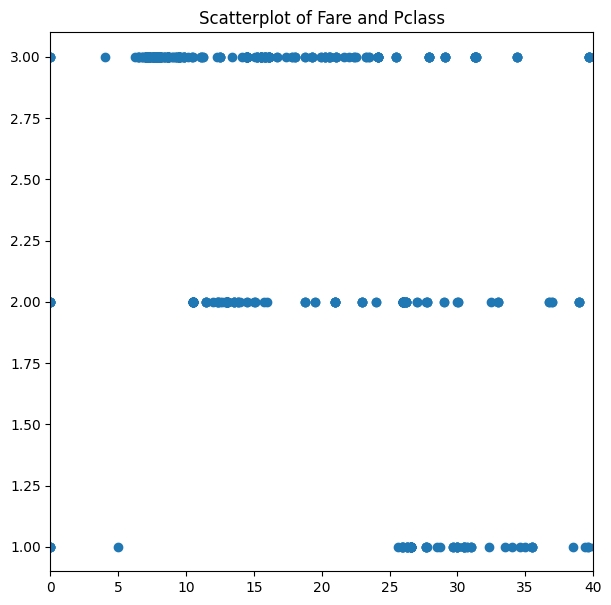

In [ ]:
#Plot  Fare and Pclass
import matplotlib.pyplot as plt

x = titanic_data['Fare']
y = titanic_data['Pclass']

plt.figure(figsize=[7, 7])
plt.scatter(x, y)
plt.xlim(0, 40)
plt.title('Scatterplot of Fare and Pclass')
plt.show()


# Create Boxplot graph to show outlier of titanic data.

<Axes: xlabel='Fare'>

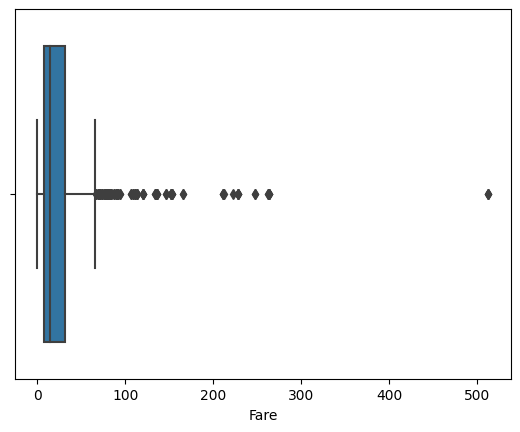

In [ ]:
sns.boxplot(x=titanic_data['Fare'])

We want to apply quantile(0.1) and quantile(0.80) as a boundary.  

<Axes: xlabel='Fare'>

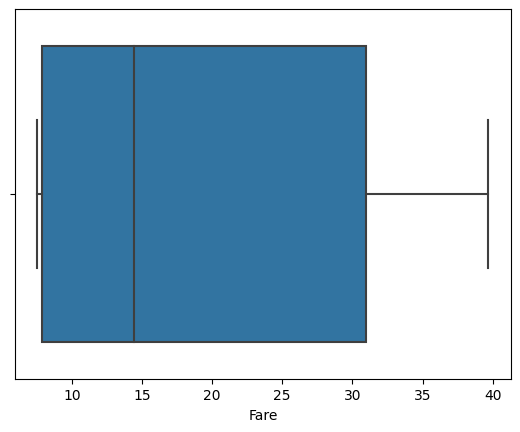

In [ ]:
sns.boxplot(x=titanic_data['Fare'])

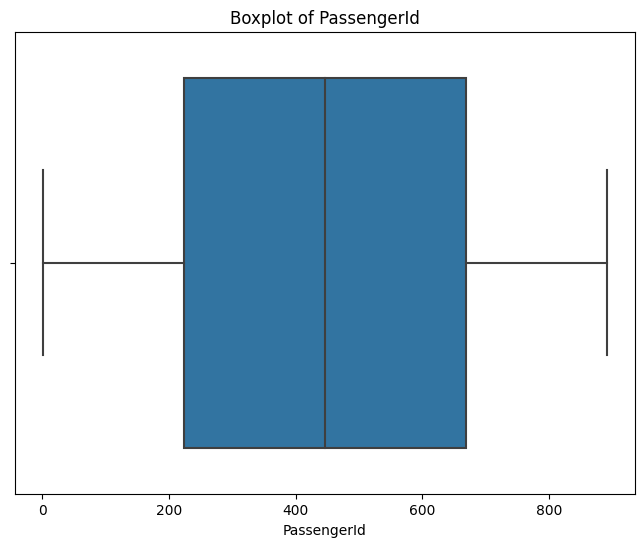

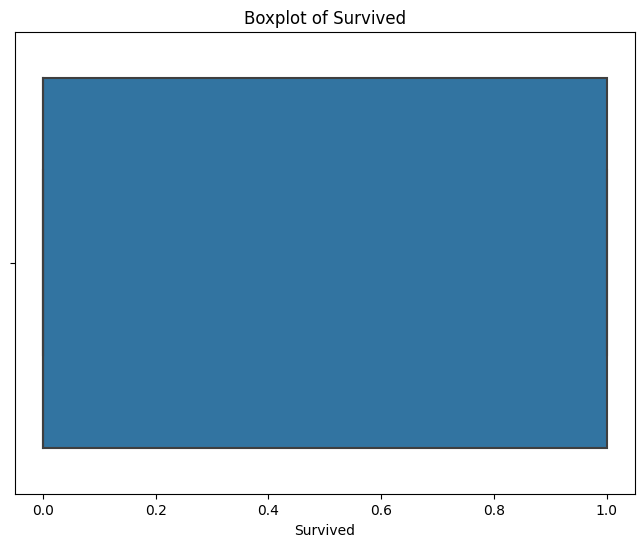

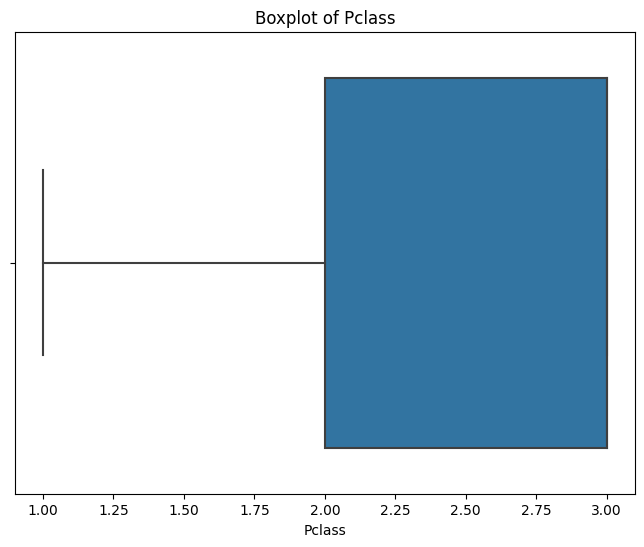

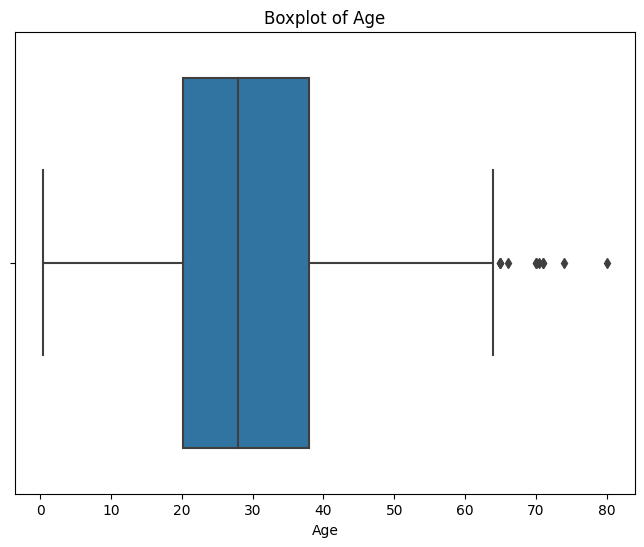

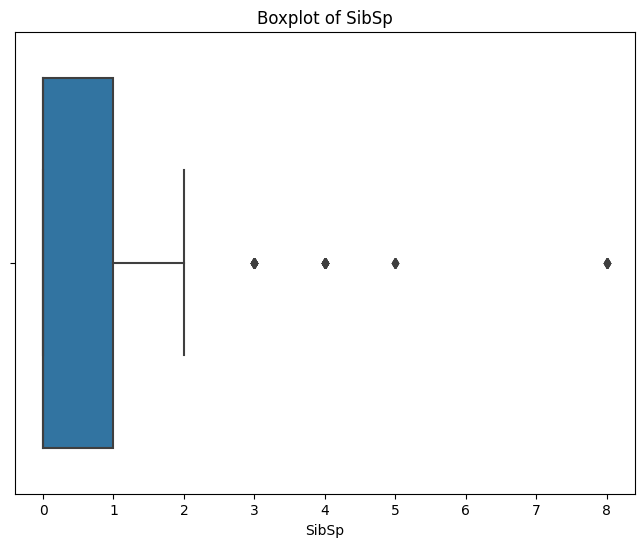

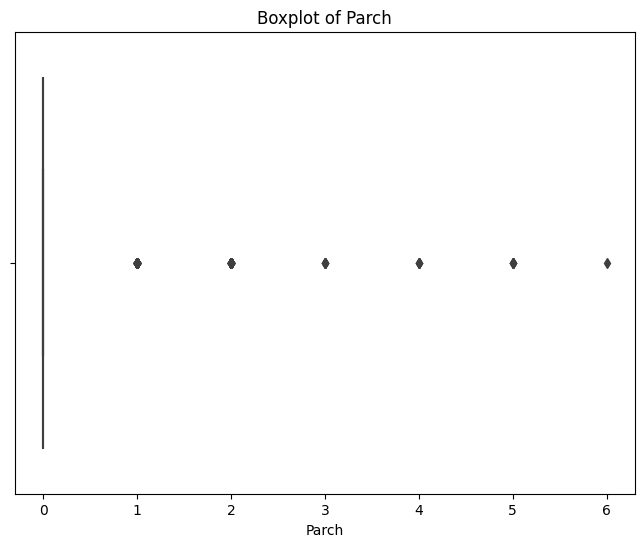

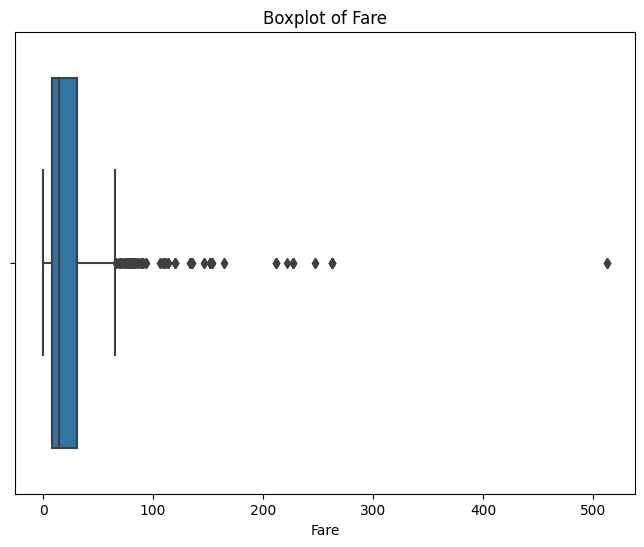

In [ ]:
plotlist = ['PassengerId', 'Survived', 'Pclass',  'Age', 'SibSp', 'Parch', 'Fare']


# Create boxplots for each column in the plotlist using a for loop
for column in plotlist:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=titanic_data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


In [ ]:
titanic_data.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.5500,S
1,2,1,1,female,38.0,1,0,39.6875,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,39.6875,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,44.5,0,0,8.4583,Q
6,7,0,1,male,54.0,0,0,39.6875,S
7,8,0,3,male,2.0,3,1,21.0750,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C


# Discritization with Age Attribute

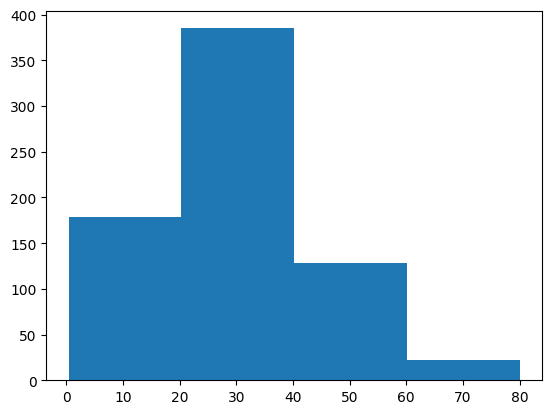

In [ ]:
plt.hist(titanic_data['Age'],bins=4)
plt.show()

Create new attribute name Age_Type using discritization from belows:

category = ['Young', 'Adults', 'Senior', 'Older']

             0-20     21-40     41-60     61-80

In [ ]:
from sklearn.impute import SimpleImputer
df = pd.DataFrame(titanic_data)

category_bins = [0, 20, 40, 60, 80]
category_labels = ['Young', 'Adults', 'Senior', 'Older']
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')

titanic_data['AgeType'] = pd.cut(x=titanic_data['Age'], bins=category_bins, labels=category_labels)
df.Price= imputer.fit_transform(df['Age'].values.reshape(-1,1))[:,0]
df


<ipython-input-98-3911e0bc90e4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_data['AgeType'] = pd.cut(x=titanic_data['Age'], bins=category_bins, labels=category_labels)
<ipython-input-98-3911e0bc90e4>:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.Price= imputer.fit_transform(df['Age'].values.reshape(-1,1))[:,0]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,category,AgeType
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Adults,Adults
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adults,Adults
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Adults,Adults
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Adults,Adults
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Adults,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,29.1250,Q,Adults,Adults
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,Adults,Adults
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,Young,Young
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,Adults,Adults


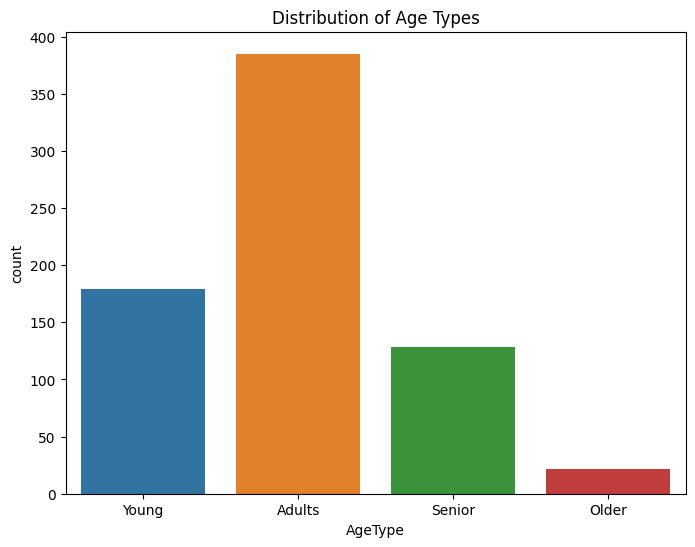

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='AgeType', data=titanic_data)
plt.title('Distribution of Age Types')
plt.show()

In [ ]:
titanic_data.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,category,AgeType
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Adults,Adults
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adults,Adults
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Adults,Adults
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Adults,Adults
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Adults,Adults
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,Senior,Senior
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,Young,Young
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,Adults,Adults
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,Young,Young
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,16.7000,S,Young,Young


# Drop column Age

In [ ]:
titanic_data = titanic_data.dropna(subset=['Age'])


In [ ]:
titanic_data.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,category,AgeType
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Adults,Adults
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adults,Adults
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Adults,Adults
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Adults,Adults
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Adults,Adults
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,Senior,Senior
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,Young,Young
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,Adults,Adults
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,Young,Young
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,16.7000,S,Young,Young
